In [1]:
import pandas as pd
import numpy as np

In [2]:
players=pd.read_csv("/content/drive/MyDrive/K-means clustering project/players_22.csv")
players.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [3]:
features=['overall','potential','wage_eur','value_eur','age']

In [4]:
players=players.dropna(subset=features)

In [5]:
data=players[features].copy()

In [6]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30


1. Scale the data
2. Initalize Random centroids
3. Label each Data point
4. Update centroids
5. Repeat steps 3 and 4 until centroids stop changing

SCALING THE DATA

In [7]:
data=((data-data.min())/(data.max()-data.min()))*9+1

In [8]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [9]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.608696,9.227468,4.618307,7.000000
1,9.804348,9.413043,7.939914,6.543654,6.333333
2,9.608696,9.217391,7.939914,3.087308,7.666667
3,9.608696,9.217391,7.939914,6.984396,5.333333
4,9.608696,9.217391,10.000000,6.822018,5.666667


Initialize our random centroid

In [24]:
def random_centroids(data,k):
  centroids=[]
  for i in range(k):
    centroid=data.apply(lambda x: float(x.sample()))
    centroids.append(centroid)
  return pd.concat(centroids,axis=1)

In [11]:
centroids=random_centroids(data,3)
centroids

,0,1,2
overall,2.173913,4.521739,4.717391
potential,4.913043,4.913043,6.478261
wage_eur,1.038627,1.090129,1.038627
value_eur,1.254749,1.043657,1.143404
age,4.666667,1.666667,3.666667


In [12]:
def get_labels(data,centroids):
  distances=centroids.apply(lambda x: np.sqrt(((data-x)**2).sum(axis=1)))
  return distances.idxmin(axis=1)

In [13]:
labels=get_labels(data,centroids)

In [14]:
labels.value_counts()

2    11068
0     4345
1     3752
dtype: int64

In [15]:
def new_centroids(data,labels,k):
  return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output 

In [17]:
def plot_clusters(data,labels,centroids,iteration):
  pca=PCA(n_components=2)
  data_2d=pca.fit_transform(data)
  centroids_2d=pca.transform(centroids.T)
  clear_output(wait=True)
  plt.title(f'Iteration{iteration}')
  plt.scatter(x=data_2d[:,0],y=data_2d[:,1],c=labels)
  plt.scatter(x=centroids_2d[:,0] ,y=centroids_2d[:,1])
  plt.show()

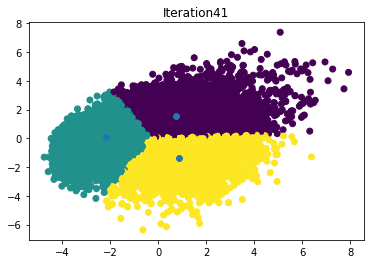

In [18]:
max_iterations=100
k=3


centroids=random_centroids(data,k)
old_centroids=pd.DataFrame()
iteration=1

while iteration < max_iterations and not centroids.equals(old_centroids):
  old_centroids=centroids


  labels=get_labels(data,centroids)
  centroids=new_centroids(data,labels,k)
  plot_clusters(data,labels,centroids,iteration)
  iteration +=1

In [19]:
centroids

,0,1,2
overall,5.806043,3.206838,4.784633
potential,6.497993,4.928473,4.506962
wage_eur,1.420001,1.028505,1.118904
value_eur,1.285501,1.026614,1.044980
age,3.596161,2.518708,5.472247


In [20]:
from sklearn.cluster import KMeans

In [21]:
kmeans=KMeans(3)
kmeans.fit(data)


KMeans(n_clusters=3)

In [22]:
centroids=kmeans.cluster_centers_

In [23]:
pd.DataFrame(centroids,columns=features).T

,0,1,2
overall,3.601045,4.800664,6.232910
potential,5.207475,4.503674,6.623315
wage_eur,1.040009,1.112818,1.657878
value_eur,1.035859,1.039996,1.414071
age,2.712137,5.608914,4.142420
